## Features_selection

## (1) VarianceThreshold

In [4]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np
import matplotlib.pyplot as plt

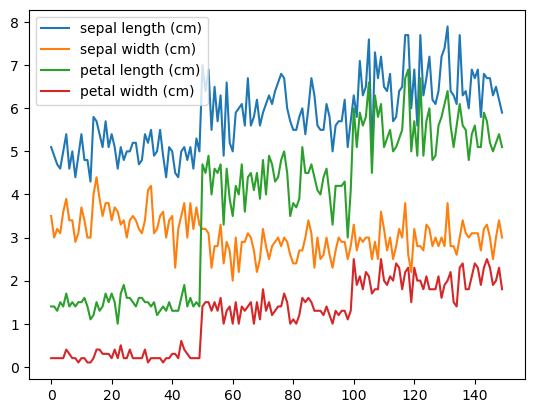

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

In [6]:
X.var(axis = 0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [8]:
selector = VarianceThreshold(threshold = 0.2)
selector.fit_transform(X)

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [9]:
selector.get_support()

array([ True, False,  True,  True])

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

## (1) SelectKBest

In [12]:
from sklearn.feature_selection import SelectKBest, chi2

In [13]:
chi2(X,y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [15]:
selector = SelectKBest(chi2 , k = 1)
selector.fit_transform(X,y)
selector.get_support()

array([False, False,  True, False])

In [16]:
selector = SelectKBest(chi2 , k = 2)
selector.fit_transform(X,y)
selector.get_support()

array([False, False,  True,  True])

## (3) SelectFromModel

In [19]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [20]:
selector = SelectFromModel(SGDClassifier(random_state = 0), threshold = 'mean')

selector.fit_transform(X,y)
selector.get_support()

array([False, False,  True,  True])

In [22]:
selector.estimator_.coef_

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

In [23]:
selector.estimator_.coef_.mean(axis=0)

array([-26.04295373, -35.56158609,  37.87734374,  19.83872585])

## (4) RFE + RFECV

In [24]:
from sklearn.feature_selection import RFE, RFECV

In [25]:
selector = RFECV(SGDClassifier(), step = 1, min_features_to_select = 2, cv = 5)

selector.fit(X,y)
selector.ranking_

array([3, 1, 2, 1])